In [5]:
from jsonschema import validate

In [6]:
schema = {"type" : "object",
          "properties" : {
              "price" : {"type" : "number"},
              "name" : {"type" : "string"},
          },
         }

In [7]:
print(validate(instance={"name" : "Eggs", "price" : 8.77}, schema=schema))

None


In [8]:
v = None
try:
    validate(instance={"name" : "Eggs", "price" : "invalid"}, schema=schema)
    print('ok')
except:
    print('error')

error


In [9]:
import ruptures as rpt
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [527]:
data = '''[
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.77},
{"name" : "Eggs", "price" : 8.76},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.64},
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.77},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.64},
{"name" : "Eggs", "price" : 8.88},
{"name" : "Eggs", "price" : 8.76},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.15},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.72},
{"name" : "Eggs", "price" : 8.15}
]'''

In [528]:
samples = json.loads(data)

In [529]:
schema = {"type" : "object", "properties" : {"price" : {"type" : "number"}, "name" : {"type" : "string"}}}

In [530]:
for key in schema["properties"].keys():
    if schema["properties"][key]["type"] == "string":
        break

In [531]:
key

'name'

In [532]:
prices = []
for sample in samples:
    prices.append(len(sample["name"]))
    print(sample["name"])
prices

Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs
Eggs


[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [470]:
prices = []
for sample in samples:
    prices.append(sample["price"])

In [533]:
prices = np.array(prices)
print(np.where(prices == max(prices)))
print(np.where(prices == min(prices)))
len(prices)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]),)


19

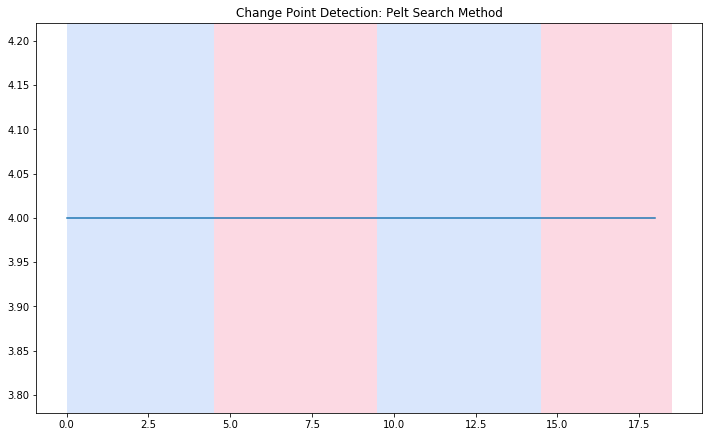

In [534]:
model = "l2"  
algo = rpt.Binseg(model=model).fit(prices)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(prices, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()

In [535]:
print(my_bkps)

[5, 10, 15, 19]


In [536]:
(len(my_bkps)- int(my_bkps[-1]/5))

1

In [537]:
a = np.array([[1,2,3],[1,3,2]])
b = [[1,2,],[1],[2]]

In [538]:
type(a[0][0]) == np.int64

True

In [539]:
int(my_bkps[-1] % 5 in {1,2})

0